In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda3\envs\DeepLearning TF modulekeras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
X = np.linspace(0, 100, 1000)
y = np.sin(X)

In [3]:
X

array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
         1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
         2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
         2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
         2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
         3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
         3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
         4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
         4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
         4.8048048 ,   4.9049049 ,   5.00500501,   5.10510511,
         5.20520521,   5.30530531,   5.40540541,   5.50550551,
         5.60560561,   5.70570571,   5.80580581,   5.90590591,
         6.00600601,   6.10610611,   6.20620621,   6.30

In [4]:
y

array([ 0.00000000e+00,  9.99330162e-02,  1.98865536e-01,  2.95807081e-01,
        3.89787104e-01,  4.79864709e-01,  5.65138069e-01,  6.44753455e-01,
        7.17913784e-01,  7.83886601e-01,  8.42011406e-01,  8.91706275e-01,
        9.32473678e-01,  9.63905466e-01,  9.85686954e-01,  9.97600074e-01,
        9.99525555e-01,  9.91444120e-01,  9.73436677e-01,  9.45683512e-01,
        9.08462478e-01,  8.62146222e-01,  8.07198446e-01,  7.44169268e-01,
        6.73689717e-01,  5.96465408e-01,  5.13269488e-01,  4.24934884e-01,
        3.32345974e-01,  2.36429728e-01,  1.38146426e-01,  3.84800478e-02,
       -6.15715795e-02, -1.61006773e-01, -2.58830020e-01, -3.54061947e-01,
       -4.45749125e-01, -5.32973611e-01, -6.14862143e-01, -6.90594881e-01,
       -7.59413613e-01, -8.20629350e-01, -8.73629220e-01, -9.17882606e-01,
       -9.52946458e-01, -9.78469728e-01, -9.94196886e-01, -9.99970476e-01,
       -9.95732696e-01, -9.81525973e-01, -9.57492539e-01, -9.23873010e-01,
       -8.81003973e-01, -

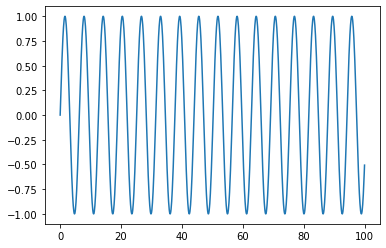

In [5]:
plt.plot(X, y)

In [6]:
df = pd.DataFrame(data=y, index=X, columns=['Sine Data'])

In [7]:
df

,Sine Data
0.0000,0.000000
0.1001,0.099933
0.2002,0.198866
0.3003,0.295807
0.4004,0.389787
...,...
99.5996,-0.802435
99.6997,-0.738785
99.7998,-0.667737
99.8999,-0.590005


In [8]:
test_percent = 0.2

In [9]:
len(df) * test_percent

200.0

In [10]:
test_point = np.round(len(df) * test_percent)

In [11]:
test_ind = int(len(df) - test_point)

In [12]:
test_ind

800

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine Data
0.00000,0.000000
0.10010,0.099933
0.20020,0.198866
0.30030,0.295807
0.40040,0.389787
...,...
79.57958,-0.862284
79.67968,-0.908576
79.77978,-0.945772
79.87988,-0.973499


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler()

In [18]:
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 2
batch_size = 1
generator = TimeseriesGenerator(scaler_train,scaler_train, length=length, batch_size=batch_size )

In [23]:
len(scaler_train)

800

In [24]:
len(generator)

798

In [26]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(scaler_train,scaler_train, length=length, batch_size=batch_size )

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [28]:
n_features = 1

In [29]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [47]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
750/750 [==============================] - 51s 68ms/step - loss: 0.0057
Epoch 2/5
750/750 [==============================] - 50s 67ms/step - loss: 3.6775e-04
Epoch 3/5
750/750 [==============================] - 50s 67ms/step - loss: 7.2633e-05
Epoch 4/5
750/750 [==============================] - 51s 67ms/step - loss: 9.6075e-05
Epoch 5/5
750/750 [==============================] - 51s 68ms/step - loss: 1.3279e-04


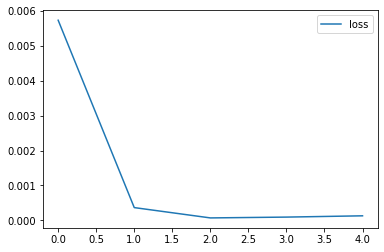

In [49]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [50]:
first_eval_batch = scaler_train[-length:]

In [51]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [52]:
model.predict(first_eval_batch)

array([[-0.00208697]], dtype=float32)

In [53]:
test_predictions = []

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:,:], [[current_pred]], axis=1)

In [54]:
test_predictions

[array([-0.00208697], dtype=float32),
 array([-0.00074023], dtype=float32),
 array([0.00532366], dtype=float32),
 array([0.01606184], dtype=float32),
 array([0.03136751], dtype=float32),
 array([0.05108076], dtype=float32),
 array([0.07499853], dtype=float32),
 array([0.10288201], dtype=float32),
 array([0.13446204], dtype=float32),
 array([0.16944313], dtype=float32),
 array([0.20750616], dtype=float32),
 array([0.24831022], dtype=float32),
 array([0.29149377], dtype=float32),
 array([0.33667585], dtype=float32),
 array([0.38345638], dtype=float32),
 array([0.43141735], dtype=float32),
 array([0.48012477], dtype=float32),
 array([0.5291296], dtype=float32),
 array([0.57797104], dtype=float32),
 array([0.62617975], dtype=float32),
 array([0.6732822], dtype=float32),
 array([0.718807], dtype=float32),
 array([0.7622886], dtype=float32),
 array([0.8032755], dtype=float32),
 array([0.8413373], dtype=float32),
 array([0.87607026], dtype=float32),
 array([0.9071052], dtype=float32),
 array(

In [55]:
scaler_test

array([[2.33031150e-04],
       [1.20941141e-03],
       [7.17951645e-03],
       [1.80835756e-02],
       [3.38124209e-02],
       [5.42085807e-02],
       [7.90678552e-02],
       [1.08141362e-01],
       [1.41138026e-01],
       [1.77727497e-01],
       [2.17543452e-01],
       [2.60187267e-01],
       [3.05232008e-01],
       [3.52226701e-01],
       [4.00700851e-01],
       [4.50169150e-01],
       [5.00136340e-01],
       [5.50102164e-01],
       [5.99566382e-01],
       [6.48033775e-01],
       [6.95019103e-01],
       [7.40051964e-01],
       [7.82681506e-01],
       [8.22480935e-01],
       [8.59051792e-01],
       [8.92027942e-01],
       [9.21079240e-01],
       [9.45914833e-01],
       [9.66286075e-01],
       [9.81989017e-01],
       [9.92866446e-01],
       [9.98809460e-01],
       [9.99758561e-01],
       [9.95704245e-01],
       [9.86687105e-01],
       [9.72797415e-01],
       [9.54174236e-01],
       [9.31004015e-01],
       [9.03518727e-01],
       [8.71993543e-01],


In [56]:
true_pred = scaler.inverse_transform(test_predictions)

In [57]:
true_pred

array([[-1.00417392],
       [-1.00148044],
       [-0.98935265],
       [-0.9678763 ],
       [-0.93726497],
       [-0.89783847],
       [-0.85000293],
       [-0.79423596],
       [-0.73107589],
       [-0.66111372],
       [-0.58498765],
       [-0.50337954],
       [-0.41701244],
       [-0.32664828],
       [-0.23308723],
       [-0.1371653 ],
       [-0.03975045],
       [ 0.05825926],
       [ 0.15594209],
       [ 0.25235952],
       [ 0.34656442],
       [ 0.43761397],
       [ 0.52457714],
       [ 0.60655105],
       [ 0.68267465],
       [ 0.75214052],
       [ 0.81421041],
       [ 0.86822832],
       [ 0.9136287 ],
       [ 0.94994652],
       [ 0.97682702],
       [ 0.99402261],
       [ 1.00139832],
       [ 0.99892735],
       [ 0.98668635],
       [ 0.96484601],
       [ 0.93366706],
       [ 0.89348614],
       [ 0.84471166],
       [ 0.78781271],
       [ 0.72331441],
       [ 0.65179277],
       [ 0.57387185],
       [ 0.49022329],
       [ 0.4015627 ],
       [ 0

In [58]:
test

,Sine Data,Pred
80.08008,-0.999534,-0.996231
80.18018,-0.997581,-0.991499
80.28028,-0.985641,-0.976446
80.38038,-0.963833,-0.949649
80.48048,-0.932375,-0.913054
...,...,...
99.59960,-0.802435,-1.027573
99.69970,-0.738785,-1.009170
99.79980,-0.667737,-0.980366
99.89990,-0.590005,-0.941749


In [59]:
test['Pred'] = true_pred

D:\Anaconda3\envs\DeepLearning TF modulekeras\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
test

,Sine Data,Pred
80.08008,-0.999534,-1.004174
80.18018,-0.997581,-1.001480
80.28028,-0.985641,-0.989353
80.38038,-0.963833,-0.967876
80.48048,-0.932375,-0.937265
...,...,...
99.59960,-0.802435,-1.007472
99.69970,-0.738785,-0.964246
99.79980,-0.667737,-0.912028
99.89990,-0.590005,-0.851367


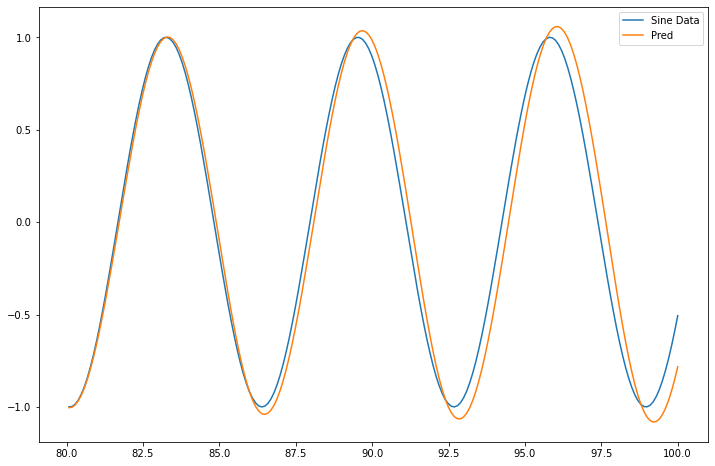

In [61]:
test.plot(figsize=(12,8))